In [1]:
import numpy as np
import h5py
import yaml
import os
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('dark_background')


In [16]:
sub = 1
ses = 1
run_id = 4
task = 'test'

data_fn = f'{os.path.split(os.getcwd())[0]}/logs/sub-{str(sub).zfill(2)}_ses-{str(ses).zfill(1)}_task-{task}_run-{str(run_id).zfill(2)}_events.tsv'
print(data_fn)
d_df = pd.read_csv(data_fn, delimiter='\t' , index_col=0, na_values='NA')

/Users/knapen/projects/expectation_orientation/logs/sub-01_ses-1_task-test_run-04_events.tsv


In [30]:
response_df = d_df.loc[(d_df['event_type'] == 'response') & (d_df['response'] != 'space') & -d_df['response'].isnull()]

<AxesSubplot:>

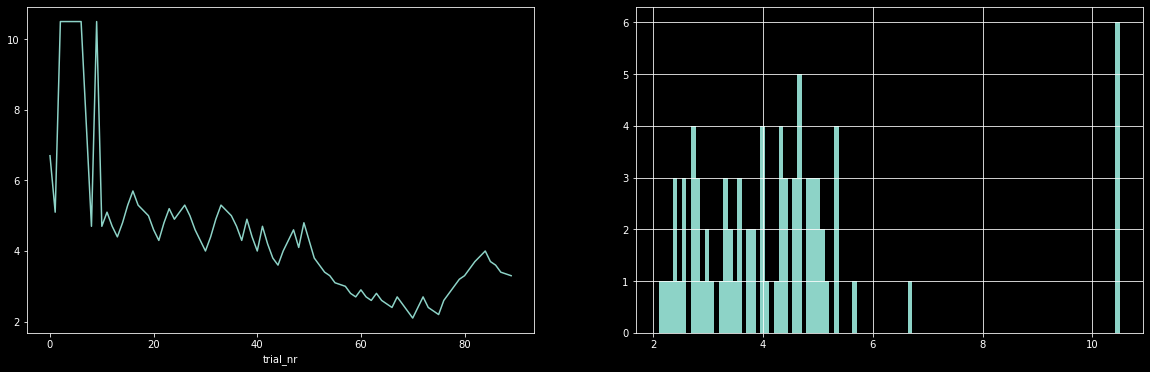

In [37]:
f, sbps = plt.subplots(1, 2, figsize=(20,6))
response_df.staircase_value.plot(ax=sbps[0])
response_df.staircase_value.hist(bins=100, ax=sbps[1])

In [40]:
np.arange(0,7.4,0.2)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ,
       5.2, 5.4, 5.6, 5.8, 6. , 6.2, 6.4, 6.6, 6.8, 7. , 7.2])